# Which demographic factors are associated with employee resignation in India?
#### STAT 301 Group Project - Part 3 (Group Final Report)
#### Group members: Lucas Qin, Rooney Tam, Avishka Pratap

In [2]:
# Main developer: Lucas, Avishka, Rooney
library(tidyverse)
library(broom)
library(GGally)
library(gridExtra)
library(car)
library(tidymodels)

# 1. Introduction

Employee resignation is a prominent concern for companies worldwide since high employee turnover rates can negatively impact a company, both directly and indirectly, as well as in the short and long run (Jha, 2009; Long et al., 2012). Hence, studying the factors influencing employee resignation might assist companies in addressing this issue (Klotz & Bolino, 2016).

Previous studies have identified three major factors contributing to employee resignation, namely (1) demographic factors such as age, gender, educational background; (2) personal factors including finances, health & well-being and family conflict; and (3) work-related factors such as work environment, career growth opportunities and job satisfaction (Arnold & Feldman, 1982; Carmeli, 2005; Jha, 2009). However, few studies have quantitatively investigated which demographic factors influence employee resignation. Existing literature is mostly qualitative and based on informal theories. Moreover, prior research has been mainly conducted in the Western world (Khatri et al., 2001). Given the sharp contrast in socio-cultural and economic conditions between Asian and Western countries, these study findings might not be relevant in an Asian context (Cotton and Tuttle, 1986 as cited in Khatri et al., 2001). Thus, we decided to focus our research on the relationship between demographic factors and employee resignation.

To do so, we are using the `Employee.csv` dataset obtained from [Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset). It contains anonymized demographic information about 4653 employees from an Indian company which is stored in 9 variables namely:

- `Education`: the educational credentials of an employee (one of Bachelors, Masters, PhD) represented as a string

- `JoiningYear`: the year an employee joined the company represented as an integer in the range [2012, 2018]

- `City`: the workplace location of an employee (one of Pune, Bangalore, New Delhi) represented as a string

- `PaymentTier`: the salary level of an employee represented as an integer in the range [1, 3]

- `Age`: an employee's age represented as an integer in the range [22, 41]

- `Gender`: the sex of an employee (one of male, female) represented as a string

- `EverBenched`: whether an employee did not have any allocated project for a short period of time, represented as a string (one of Yes, No)

- `ExperienceInCurrentDomain`: the number of years of work experience an employee has in their current field, represented as an integer in the range [0, 7]

- `LeaveOrNot`: whether an employee left the company, represented as an integer [0, 1] where 1 indicates that the employee left the company and 0 indicates that the employee still works for the company.

Moving forward, our report will include regression methods applied on our dataset. Additionally, we will also include a discussion section that seeks to answer our research question: **Which demographic factors are associated with employee resignation in India?**

# 2. Methods and Results

#### a) Exploratory Data Analysis (EDA)

The dataset is loaded into R, and the categorical variables are transformed into factors (since R prefers categorical variables to be represented as factors rather than character strings). The variable `PaymentTier` is represented as a categorical variable, since there are only 3 possible values and so representing it as an integer may not be optimal.

In [3]:
# Main developer: Lucas
data = read_csv("Employee.csv")

colnames = (tibble(name = colnames(data)) %>% filter(
    !(name %in% c("JoiningYear", "Age", "ExperienceInCurrentDomain"))
))$name

for (col in colnames) {
    eval(parse(text = paste0("data$", col, " = as.factor(data$", col, ")")))
}

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


This is a snippet of the dataset:

In [4]:
# Main developer: Lucas
head(data)

Education JoiningYear City      PaymentTier Age Gender EverBenched
1 Bachelors 2017        Bangalore 3           34  Male   No         
2 Bachelors 2013        Pune      1           28  Female No         
3 Bachelors 2014        New Delhi 3           38  Female No         
4 Masters   2016        Bangalore 3           27  Male   No         
5 Masters   2017        Pune      3           24  Male   Yes        
6 Bachelors 2016        Bangalore 3           22  Male   No         
  ExperienceInCurrentDomain LeaveOrNot
1 0                         0         
2 3                         1         
3 2                         0         
4 5                         1         
5 2                         1         
6 0                         0

<span style="color:green">*Table 2.1.1 - Snippet of Dataset*</span>

Here is some summary information about the variables in the dataset. The integer variables (`JoiningYear`, `Age`, and `ExperienceInCurrentDomain`) have their minimum, mean, maximum, and 3 quartiles displayed, while the categorical variables have all of their categories displayed:

In [5]:
# Main developer: Lucas
summary(data)

     Education     JoiningYear          City      PaymentTier      Age       
 Bachelors:3601   Min.   :2012   Bangalore:2228   1: 243      Min.   :22.00  
 Masters  : 873   1st Qu.:2013   New Delhi:1157   2: 918      1st Qu.:26.00  
 PHD      : 179   Median :2015   Pune     :1268   3:3492      Median :28.00  
                  Mean   :2015                                Mean   :29.39  
                  3rd Qu.:2017                                3rd Qu.:32.00  
                  Max.   :2018                                Max.   :41.00  
    Gender     EverBenched ExperienceInCurrentDomain LeaveOrNot
 Female:1875   No :4175    Min.   :0.000             0:3053    
 Male  :2778   Yes: 478    1st Qu.:2.000             1:1600    
                           Median :3.000                       
                           Mean   :2.906                       
                           3rd Qu.:4.000                       
                           Max.   :7.000                       

<span style="color:green">*Table 2.1.2 - Summary Information of Dataset*</span>

The distributions of the categorical variables are known from the summary above. For the numerical variables, it is a good idea to explore their distributions through histograms:

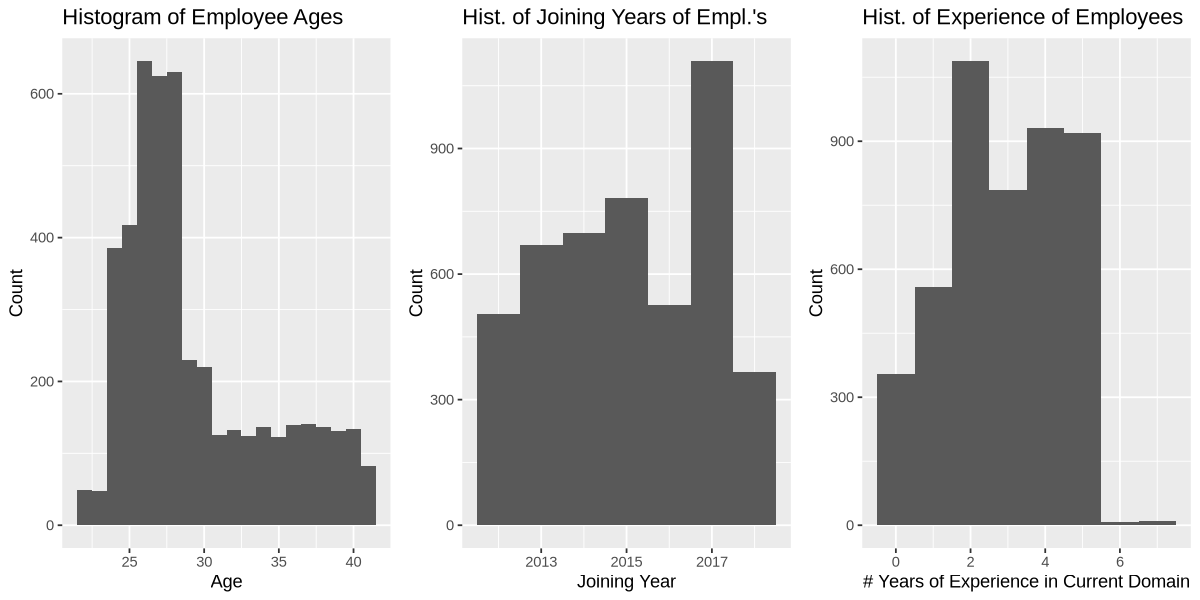

In [6]:
# Main developer: Lucas
options(repr.plot.height = 5, repr.plot.width = 10)

age_histogram = ggplot(data, aes(Age)) + geom_histogram(binwidth = 1) + labs(
    x = "Age",
    y = "Count",
    title = "Histogram of Employee Ages"
)

year_histogram = ggplot(data, aes(JoiningYear)) + geom_histogram(binwidth = 1) + labs(
    x = "Joining Year",
    y = "Count",
    title = "Hist. of Joining Years of Empl.'s"
)

exp_histogram = ggplot(data, aes(ExperienceInCurrentDomain)) + geom_histogram(binwidth = 1) + labs(
    x = "# Years of Experience in Current Domain",
    y = "Count",
    title = "Hist. of Experience of Employees"
)

grid.arrange(age_histogram, year_histogram, exp_histogram, ncol = 3)

<span style="color:green">*Plot 2.1.3 - Histograms for Numerical Variables in the Dataset*</span>

It is also a good idea to explore associations between variables through pairwise association plots (i.e. the type of plot produced by `ggpairs`). The associations between the response variable (`LeaveOrNot`) and the explanatory variables are of especially high importance.

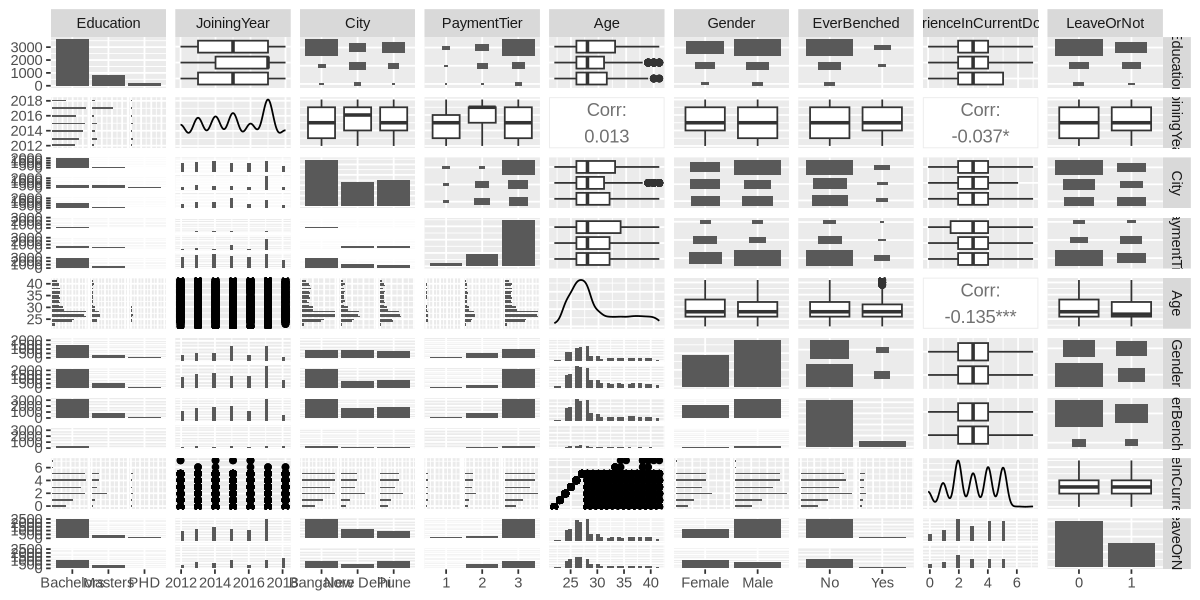

In [7]:
# Main developer: Lucas
pairwise_plots = ggpairs(data)
suppressMessages(print(pairwise_plots))

<span style="color:green">*Plot 2.1.4 - Pairwise Plots of Variables in the Dataset*</span>

Finally, to wrap up with our exploratory data analysis, we check the explanatory variables for multicollinearity:

In [8]:
# Main developer: Avishka
# Contributor: Rooney, Lucas
vif(glm(LeaveOrNot ~ ., data = data, family = binomial))

GVIF     Df GVIF^(1/(2*Df))
Education                 1.330936 2  1.074087       
JoiningYear               1.071311 1  1.035041       
City                      1.540927 2  1.114155       
PaymentTier               1.298603 2  1.067503       
Age                       1.025457 1  1.012648       
Gender                    1.103771 1  1.050605       
EverBenched               1.011777 1  1.005871       
ExperienceInCurrentDomain 1.023014 1  1.011442

<span style="color:green">*Table 2.1.5 - Variance Inflation Factors for each Explanatory Variable*</span>

Since all of the explanatory variables have a VIF less than 5, we do not expect to face any problems with multicollinearity in our analysis of this dataset.

#### b) Methods: Plan

To find which demographic factors are associated with employee resignation, we perform a logistic regression with `LeaveOrNot` as the response variable. However, at this moment we do not know which of the other variables are high-quality explanatory variables, and which are not useful for inference. To find out, we perform variable selection using forward selection, with BIC as our evaluation metric.

To perform this variable selection, we start from a null model with no explanatory variables, and then build our way up 1 additional variable at a time, choosing the model with the most optimal BIC for each model size (i.e. number of explanatory variables). Then, out of these optimal models for each size, we choose a final best model by comparing the different models with different sizes and picking the one with the most optimal BIC.

Here is the definition of the custom function used to perform variable selection, as well as some helper functions used by it:

In [9]:
# Main developer: Lucas

# puts plus signs between variable names to prepare them for a formula
# example: input = c("a", "b", "c"), output = "a + b + c"
plusser = function(vars) {
    if (length(vars) == 1) {
        return (vars[1])
    }
    result = vars[1]
    for (i in 2 : length(vars)) {
        result = paste0(result, " + ", vars[i])
    }
    return (result)
}

# finds all entries in the big vector that are not in the small vector
# example: input = {big = c("a", "b", "c", "d", "e"), small = c("a", "d")}, output = c("b", "c", "e")
in_big_but_not_in_small = function(big, small) {
    result = c()
    for (var in big) {
        if (!(var %in% small)) {
            result = c(result, var)
        }
    }
    return (result)
}

# custom function to perform forward selection using a custom metric
# metric could be something standard like AIC or BIC, or it could be something custom-defined
forward_selection_custom_metric = function(data, metric) {

    explanatory_variables = colnames(data)[1 : length(colnames(data)) - 1]
    curr_vars = c()
    
    null_model = glm(LeaveOrNot ~ 1, data = data, family = binomial)
    model_size_metric = tibble(size = 0, metric = metric(null_model), vars = "(None)")

    for (num_vars in 1 : length(explanatory_variables)) {
        
        best_metric_in_this_num_vars = Inf
        best_vars_to_get_best_metric = NA
        
        for (new_var in in_big_but_not_in_small(big = explanatory_variables, small = curr_vars)) {
            temp_vars = c(curr_vars, new_var)
            model = glm(
                formula = eval(parse(text = paste0("LeaveOrNot ~ ", plusser(temp_vars)))),
                data = data,
                family = binomial
            )
            curr_metric = metric(model)
            if (curr_metric < best_metric_in_this_num_vars) {
                best_metric_in_this_num_vars = curr_metric
                best_vars_to_get_best_metric = temp_vars
            }
        }
        
        curr_vars = best_vars_to_get_best_metric
        model_size_metric = rbind(
            model_size_metric,
            tibble(
                size = num_vars,
                metric = best_metric_in_this_num_vars,
                vars = plusser(curr_vars)
            )
        )
        
    }
    
    return (model_size_metric %>% arrange(metric))

}

Before we proceed with forward selection, we should split our dataset into a selection set and an inference set.

In [10]:
# Main developer: Lucas, Rooney, Avishka
set.seed(1234)
split = initial_split(data, prop = 0.5)
select = training(split)
infer = testing(split)

Here, we use this custom function to perform the selection itself (on the selection set), and report the optimal model for each model size:

In [11]:
# Main developer: Lucas
forward_selection_custom_metric(select, function(model) {
    return (glance(model)$BIC)
})

size metric  
1 7    2704.651
2 6    2705.772
3 5    2709.976
4 8    2711.107
5 4    2732.498
6 3    2781.137
7 2    2822.314
8 1    2871.014
9 0    3026.913
  vars                                                                                                 
1 PaymentTier + Gender + JoiningYear + City + Education + EverBenched + Age                            
2 PaymentTier + Gender + JoiningYear + City + Education + EverBenched                                  
3 PaymentTier + Gender + JoiningYear + City + Education                                                
4 PaymentTier + Gender + JoiningYear + City + Education + EverBenched + Age + ExperienceInCurrentDomain
5 PaymentTier + Gender + JoiningYear + City                                                            
6 PaymentTier + Gender + JoiningYear                                                                   
7 PaymentTier + Gender                                                                                 
8 PaymentTier                                                                                          
9 (None)

<span style="color:green">*Table 2.2.1 - Optimal Model for Each Model Size from Forward Selection*</span>

Therefore, our final model will contain the variables `PaymentTier`, `Gender`, `JoiningYear`, `City`, `Education`, `EverBenched`, and `Age`. We choose these explanatory variables because the model with these 7 variables gives the most optimal BIC, from forward selection.

Now, we will fit this final model (using the inference set), and then interpret it:

In [12]:
# Main developer: Lucas
# Contributor: Rooney, Avishka

model = glm(
    LeaveOrNot ~ PaymentTier + Gender + JoiningYear + City + Education + EverBenched + Age,
    family = binomial,
    data = infer
)

coef_table = tidy(model, exponentiate = TRUE, conf.int = TRUE, conf.level = 0.95)

cbind(
    coef_table %>% select(term),
    coef_table %>% select(-term) %>% round(4)
)

term             estimate std.error statistic p.value conf.low conf.high
1  (Intercept)      0.0000   54.6936   -7.5442   0.0000  0.0000   0.0000   
2  PaymentTier2     2.4075    0.2392    3.6725   0.0002  1.5164   3.8808   
3  PaymentTier3     1.1649    0.2185    0.6984   0.4849  0.7658   1.8076   
4  GenderMale       0.4004    0.1016   -9.0042   0.0000  0.3279   0.4885   
5  JoiningYear      1.2272    0.0272    7.5406   0.0000  1.1640   1.2947   
6  CityNew Delhi    0.5613    0.1417   -4.0765   0.0000  0.4242   0.7393   
7  CityPune         1.7626    0.1208    4.6922   0.0000  1.3906   2.2332   
8  EducationMasters 1.9100    0.1365    4.7415   0.0000  1.4622   2.4973   
9  EducationPHD     1.3055    0.2591    1.0288   0.3036  0.7749   2.1472   
10 EverBenchedYes   1.8068    0.1487    3.9784   0.0001  1.3488   2.4171   
11 Age              0.9754    0.0103   -2.4145   0.0158  0.9558   0.9952

<span style="color:green">*Table 2.2.2 - Coefficients, $p$-values, and Confidence Intervals for the Optimal Model*</span>

We will use a significance level of 0.05 in our analysis. Here is the interpretation of our model:

- `(Intercept)`: When an employee has payment tier 1, is female, joined the company in the year 0, is based in Bangalore, has a bachelor's degree, has never benched, and is 0 years old, we expect the associated odds of this employee leaving to be 0.0000. Since this involves the year 0 and someone who is 0 years old, this value is nonsensical and not worth interpreting. Therefore we will not interpret the intercept's confidence interval or p-value.

- `Age`: An increase of 1 year in an employee's age is associated with a factor of 0.9754 (i.e. 2.46% decrease) in the odds of the employee leaving, keeping all other variables constant. We are 95% confident that the factor is between 0.9558 (i.e. 4.42% decrease) and 0.9952 (i.e. 0.48% decrease). The $p$-value for this variable is 0.0158, and so it is significant in our model when we hold our significance level at 5%.

- `GenderMale`: The odds of a male employee leaving is expected to be 0.4004 (i.e. 40.04%) times the odds of a female employee leaving, keeping all other variables constant. We are 95% confident that the factor is between 0.3279 (i.e. 32.79%) and 0.4885 (i.e. 48.85%). With a $p$-value of 0.0000, this variable is therefore significant for our model when we hold our significance level at 5%.

- The rest of the coefficients can be interpreted in a similar manner. For the sake of space, we will not include their interpretations here.

Every variable in our optimal model is signficant. Some of the levels of several categorical levels are by themselves not signficant, but since every categorical variable has at least 1 significant level, the entire variable is considered significant by extension.

Since this model is designed for inference, there will not be an evaluation or assessment metric on the entire model due to the lack of a test set. <span style="color:blue">*(This has been approved by Rodolfo.)*</span>

# 3. Discussion

Through our analysis, we conclude that there is statistical association between whether an employee from India resigns or not, and the employee's demographic factors, specifically their salary tier, gender, year of joining their company, city that they are based on, level of education attained, whether they have ever been without assigned work, and age. The implication of our findings is that other companies can use our results as a reference to address non-ideal employee resignation rates.

We did not have any expectations of what we should find ahead of the analysis. However, the optimal model we fitted concurs with the findings found in the exploratory data analysis.

Our model could be improved by adding interaction terms, as well as potentially quadratic terms of the numerical variables. We could potentially have used a different variable selection metric (other than AIC or BIC) that is more suitable for our dataset. If we had access to more explanatory variables, we could possibly clarify some of the remaining unexplained variation using them.

How socio-economic and personal factors affect employee resignation are promising areas of research. In the analysis we conducted, there was no information about whether the employees voluntarily quit their job or were fired. One potential future question, thus, could be to investigate which demographic factors are more associated with leaving a company voluntarily, and which demographic factors are more associated with being fired from a company.

# 4. References

Arnold, H. J., & Feldman, D. C. (1982). A multivariate analysis of the determinants of job turnover. Journal of applied psychology, 67(3), 350.

Carmeli, A. (2005). The relationship between organizational culture and withdrawal intentions and behavior. International Journal of manpower, 26(2), 177-195.

Cotton, J. L., & Tuttle, J. M. (1986). Employee turnover: A meta-analysis and review with implications for research. Academy of management Review, 11(1), 55-70.

Jha, S. (2009). Determinants of employee turnover intentions: A review. Management Today, 9(2).

Khatri, N., Fern, C. T., & Budhwar, P. (2001). Explaining employee turnover in an Asian context. Human Resource Management Journal, 11(1), 54-74.

Klotz, A. C., & Bolino, M. C. (2016). Saying goodbye: The nature, causes, and consequences of employee resignation styles. Journal of Applied Psychology, 101(10), 1386.

Long, C. S., Thean, L. Y., Ismail, W. K. W., & Jusoh, A. (2012). Leadership styles and employees’ turnover intention: Exploratory study of academic staff in a Malaysian College. World Applied Sciences Journal, 19(4), 575-581.